In [ ]:
# # Import statements
# import pandas as pd
# import numpy as np
# import re
# import json
# import nltk
# import matplotlib.pyplot as plt
# import seaborn as sns
# import multiprocessing
# # --- these files must be downloaded to run the program ---
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('words')
# nltk.download('punkt')
# # ----------------------------------------------------------
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
# from gensim.models import Doc2Vec
# #from gensim.models import Word2Vec
# from gensim.models.doc2vec import TaggedDocument
# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer
# from sklearn import metrics,utils
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from collections import Counter
# from wordcloud import WordCloud, STOPWORDS

In [ ]:
# importing pandas for dataframe operations
import pandas as pd

In [ ]:
# creating dataframe from the dataset
df = pd.read_csv('hate_speech_dataset.csv')
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


DATA PREPROCESSING

In [ ]:
# importing preprocessing libraries
import numpy as np
import re
import nltk
# --- these files must be downloaded to run the program ---
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')
# ----------------------------------------------------------
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# function to preprocess given tweet (this method is used for tf-idf vectorization where removing stopwords and lemmatization is important)
def preprocess_tweet(tweet):
  # retrieving stop words
  stop_words = set(stopwords.words('english'))
  # retrieving english words
  #eng_words = set(nltk.corpus.words.words())
  if type(tweet) == np.float:
    return ""
  # lowercasing all the letters
  result = tweet.lower()
  # to avoid removing contractions in english
  result = re.sub("'", "", result)
  # removing hashtags and mentions
  result = re.sub("@[A-Za-z0-9_]+","", result)
  result = re.sub("#[A-Za-z0-9_]+","", result)
  # removing links
  result = re.sub(r'http\S+', '', result)
  result = re.sub(r"www.\S+", "", result)
  # removing punctuations
  result = re.sub('[()!?]', ' ', result)
  result = re.sub('\[.*?\]',' ', result)
  # removing non-alphanumeric characters
  result = re.sub("[^a-z0-9]"," ", result)
  # tokenization
  result = word_tokenize(result)
  # removing stopwords, one letter words and stem the resulting words using lemmatizer
  #result = [PorterStemmer().stem(w) for w in result if not w in stop_words and len(w) > 2]
  result = [WordNetLemmatizer().lemmatize(w) for w in result if not w in stop_words and len(w) > 2]
  # detokenization
  result = " ".join(word for word in result)
  return result

In [ ]:
# # function to preprocess given tweet (for bert models)
# def bert_preprocess_tweet(tweet):
#   # lowercasing all the letters
#   result = tweet.lower()
#   # # to avoid removing contractions in english
#   # result = re.sub("'", "", result)
#   # removing hashtags and mentions
#   result = re.sub("@[A-Za-z0-9_]+","", result)
#   #result = re.sub("#[A-Za-z0-9_]+","", result)
#   result = re.sub("#","", result)
#   # removing links
#   result = re.sub(r'http\S+', '', result)
#   result = re.sub(r"www.\S+", "", result)
#   # removing punctuations
#   result = re.sub('[()!?]', ' ', result)
#   result = re.sub('\[.*?\]',' ', result)
#   # removing non-alphanumeric characters
#   result = re.sub("[^a-z0-9']"," ", result)
#   # removing extra space
#   result = re.sub("\s\s+", " ", result)
#   result = re.sub('^\s+|\s+$', "", result)
#   # # tokenization
#   # result = word_tokenize(result)
#   # # removing stopwords, one letter words and stem the resulting words using lemmatizer
#   # #result = [PorterStemmer().stem(w) for w in result if not w in stop_words and len(w) > 2]
#   # result = [WordNetLemmatizer().lemmatize(w) for w in result if not w in stop_words and len(w) > 2]
#   # # detokenization
#   # result = " ".join(word for word in result)
#   return result

In [ ]:
# adding clean tweets to dataframe
clean_tweet = []
for i in range(len(df)):
  clean_tweet.append(preprocess_tweet(df['tweet'][i]))

df['clean_tweet'] = clean_tweet
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


,Unnamed: 0,Toxicity,tweet,clean_tweet
0,0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunction
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks credit cant use cause dont offer wheelc...
2,2,0,bihday your majesty,bihday majesty
3,3,0,#model i love u take with u all the time in ...,love take time
4,4,0,factsguide: society now #motivation,factsguide society
...,...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous muthaf lie right trash mine bible scriptu...
56741,56741,1,"you've gone and broke the wrong heart baby, an...",youve gone broke wrong heart baby drove rednec...
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan eat dat nigguh like aint fuckin...
56743,56743,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


DATASET DESCRIPTION

In [ ]:
# table to show number of tweets for categories hate speech and non-hate speech
df0 = df[df['Toxicity'] == 0]
df1 = df[df['Toxicity'] == 1]

# hate_count = 0
# non_hate_count = 0
# for elem in df['Toxicity']:
#   if elem == 0:
#     non_hate_count += 1
#   else:
#     hate_count += 1
# # print(hate_count)
# # print(non_hate_count)
d = {
    'Hate speech' : [len(df1)],
    'Non-hate speech': [len(df0)]}
toxicity_df = pd.DataFrame(data=d)
toxicity_df

,Hate speech,Non-hate speech
0,24153,32592


In [ ]:
# importing Counter library to count top 50 hate/non-hate words
from collections import Counter

In [ ]:
# Extracting top 50 hate and non hate word tuples from the dataset
top50_hate_word_tuples = Counter(" ".join(df1["clean_tweet"]).split()).most_common(50)
top50_non_hate_word_tuples = Counter(" ".join(df0["clean_tweet"]).split()).most_common(50)
print(top50_hate_word_tuples)
print(top50_non_hate_word_tuples)
# retrieving just words from the list of tuples
top50_hate_words = []
top50_non_hate_words = []

for i in range(len(top50_hate_word_tuples)):
  top50_hate_words.append(top50_hate_word_tuples[i][0])
for i in range(len(top50_non_hate_word_tuples)):
  top50_non_hate_words.append(top50_non_hate_word_tuples[i][0])
print(top50_hate_words)
print(top50_non_hate_words)

[('bitch', 11438), ('hoe', 4331), ('like', 2777), ('pussy', 2256), ('nigga', 2019), ('dont', 1721), ('as', 1585), ('got', 1531), ('fuck', 1486), ('get', 1474), ('shit', 1307), ('aint', 1145), ('amp', 1104), ('lol', 1009), ('know', 827), ('trash', 772), ('girl', 719), ('one', 699), ('love', 689), ('cant', 652), ('fucking', 641), ('yall', 639), ('want', 619), ('thats', 604), ('say', 598), ('youre', 563), ('bad', 561), ('look', 558), ('make', 556), ('man', 539), ('faggot', 522), ('need', 518), ('good', 509), ('white', 506), ('hate', 501), ('think', 489), ('people', 463), ('time', 461), ('see', 451), ('still', 444), ('let', 442), ('back', 434), ('never', 434), ('gon', 421), ('real', 415), ('right', 406), ('day', 405), ('really', 396), ('said', 373), ('even', 371)]
[('day', 2611), ('amp', 1602), ('happy', 1594), ('love', 1313), ('time', 1244), ('today', 1068), ('like', 1066), ('get', 1059), ('new', 928), ('one', 898), ('make', 872), ('life', 840), ('cant', 828), ('good', 827), ('people', 79

CREATING WORDCLOUDS FOR FREQUENTLY USED HATE AND NON-HATE WORDS

In [ ]:
# importing libraries to plot a wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# create a function to draw word cloud for given list of words
def draw_wordcloud(word_list,title):
  # combining list of hate words into a string
  word_str = ''
  for i in range(len(word_list)):
    word_str += word_list[i] + " "

  # creating wordcloud for the given hate words
  wordcloud = WordCloud(width = 400, height = 400,
                  background_color ='white',
                  stopwords = set(STOPWORDS),
                  min_font_size = 10).generate(word_str)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (4, 4), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(title)
  plt.show()

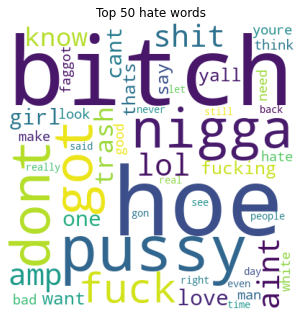

In [ ]:
# create wordcloud for top 50 hate words
draw_wordcloud(top50_hate_words, "Top 50 hate words")

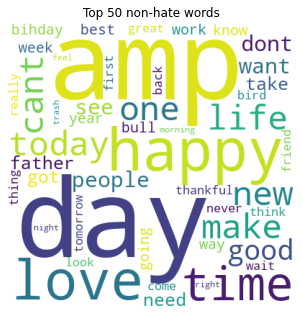

In [ ]:
draw_wordcloud(top50_non_hate_words, "Top 50 non-hate words")

In [ ]:
# creating vocabulary from the words in hate speech tweets
hate_words = []
hate_tweets = df1['clean_tweet'].to_numpy()

for tweet in hate_tweets:
  tweet_tokens = word_tokenize(tweet)
  for token in tweet_tokens:
    hate_words.append(token)

print(hate_words)
print(len(hate_words))

['call', 'middle', 'school', 'build', 'wall', 'chant', 'comment', 'retweet', 'agree', 'lumpy', 'say', 'prove', 'lumpy', 'unbelievable', '21st', 'century', 'wed', 'need', 'something', 'like', 'let', 'fight', 'white', 'establishment', 'cant', 'blk', 'folx', 'running', 'around', 'loving', 'promoting', 'greatness', 'hey', 'white', 'people', 'call', 'people', 'white', 'us', 'amp', 'insecurity', 'lure', 'men', 'interested', 'doesnt', 'address', 'amp', 'racism', 'brings', 'mocked', 'obama', 'black', 'arent', 'protesting', 'trump', 'fuhered', 'amp', 'yes', 'call', 'gorilla', 'racist', 'long', 'thought', 'black', 'people', 'bet', 'smaller', 'hand', 'show', 'barry', 'probably', 'lied', 'game', 'sucked', 'point', 'one', 'finger', 'million', 'pointed', 'right', 'back', 'might', 'libtard', 'take', 'america', 'voted', 'voted', 'voted', 'vot', 'hold', 'open', 'door', 'woman', 'shes', 'woman', 'nice', 'thing', 'thats', 'dont', 'even', 'try', 'deny', 'man', 'ran', 'governor', 'state', 'biggest', 'afric

UTILIZING HATEBASE LEXICON TO ANALYZE DIFFERENT CATEGORIES OF HATE SPEECH IN THE DATASET

In [ ]:
# importing json to retrieve hatebase vocab json file
import json

In [ ]:
# Opening JSON file which contains hatebase vocabulary
f = open('hatebase_vocab.json')
# initialize empy dictionaries for calculation of the occurences for terms of different hate speech categories such as nationality and ethnicity
hate_nationality = {}
hate_ethnicity = {}
hate_religion = {}
hate_gender = {}
hate_sexual_orientation = {}
hate_disability = {}
hate_class = {}

# returns JSON object as a dictionary
hate_vocab = json.load(f)
# for each word in hate words check if it is inside a hatebase dictionary
for word in hate_words:
  for i in range(len(hate_vocab)):
    for vocab in hate_vocab[i]:
      # check if a specific hatebase terminology is equal to the given word in our dataset
      if word == vocab['term'].lower():
        if vocab['is_about_nationality']:
#         # if this term exists in hate_nationality dict increment the count in dict else add the term
          if word in hate_nationality.keys():
            hate_nationality[word] += 1
          else:
            hate_nationality[word] = 1
        if vocab['is_about_ethnicity']:
            # if this term exists in hate_nationality dict increment the count in dict else add the term
            if word in hate_ethnicity.keys():
              hate_ethnicity[word] += 1
            else:
              hate_ethnicity[word] = 1
        if vocab['is_about_religion']:
            # if this term exists in hate_religion dict increment the count in dict else add the term
            if word in hate_religion.keys():
              hate_religion[word] += 1
            else:
              hate_religion[word] = 1
        if vocab['is_about_gender']:
            # if this term exists in hate_gender dict increment the count in dict else add the term
            if word in hate_gender.keys():
              hate_gender[word] += 1
            else:
              hate_gender[word] = 1
        if vocab['is_about_sexual_orientation']:
            # if this term exists in hate_sexual_orientation dict increment the count in dict else add the term
            if word in hate_sexual_orientation.keys():
              hate_sexual_orientation[word] += 1
            else:
              hate_sexual_orientation[word] = 1
        if vocab['is_about_disability']:
            # if this term exists in hate_disability dict increment the count in dict else add the term
            if word in hate_disability.keys():
              hate_disability[word] += 1
            else:
              hate_disability[word] = 1
        if vocab['is_about_class']:
            # if this term exists in hate_class dict increment the count in dict else add the term
            if word in hate_class.keys():
              hate_class[word] += 1
            else:
              hate_class[word] = 1
        # since we do not need to look for other terminologies we can break from the loop
        break

In [ ]:
# sort dictionaries by key in descending order
sorted_hate_nationality = dict(sorted(hate_nationality.items(), key=lambda item: item[1], reverse=True))
sorted_hate_ethnicity = dict(sorted(hate_ethnicity.items(), key=lambda item: item[1], reverse=True))
sorted_hate_religion = dict(sorted(hate_religion.items(), key=lambda item: item[1], reverse=True))
sorted_hate_gender = dict(sorted(hate_gender.items(), key=lambda item: item[1], reverse=True))
sorted_hate_sexual_orientation = dict(sorted(hate_sexual_orientation.items(), key=lambda item: item[1], reverse=True))
sorted_hate_disability = dict(sorted(hate_disability.items(), key=lambda item: item[1], reverse=True))
sorted_hate_class = dict(sorted(hate_class.items(), key=lambda item: item[1], reverse=True))

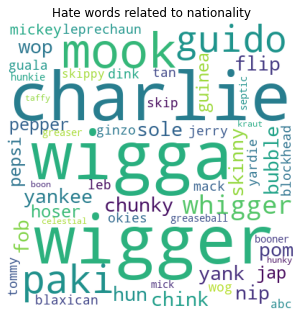

In [ ]:
# Draw wordcloud from the hate words that appear in nationality category
draw_wordcloud(list(sorted_hate_nationality.keys()),"Hate words related to nationality")

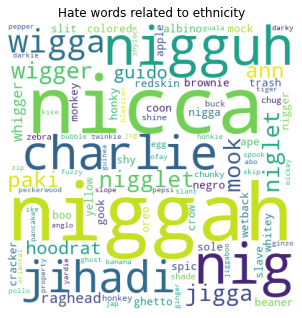

In [ ]:
# Draw wordcloud from the hate words that appear in ethnicity category
draw_wordcloud(list(sorted_hate_ethnicity.keys()),"Hate words related to ethnicity")

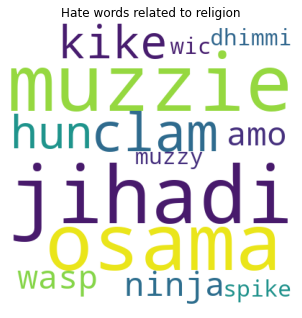

In [ ]:
# Draw wordcloud from the hate words that appear in religion category
draw_wordcloud(list(sorted_hate_religion.keys()),"Hate words related to religion")

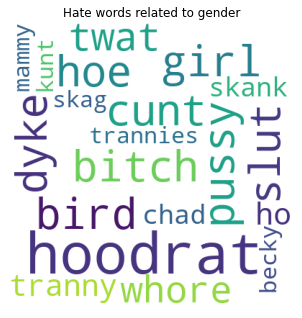

In [ ]:
# Draw wordcloud from the hate words that appear in gender category
draw_wordcloud(list(sorted_hate_gender.keys()),"Hate words related to gender")

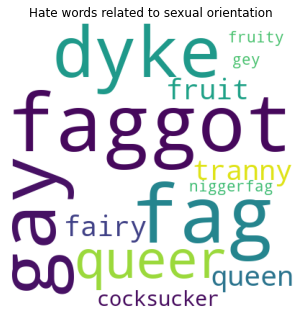

In [ ]:
# Draw wordcloud from the hate words that appear in sexual orientation category
draw_wordcloud(list(sorted_hate_sexual_orientation.keys()),"Hate words related to sexual orientation")

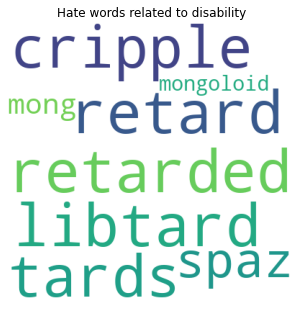

In [ ]:
# Draw wordcloud from the hate words that appear in disability category
draw_wordcloud(list(sorted_hate_disability.keys()),"Hate words related to disability")

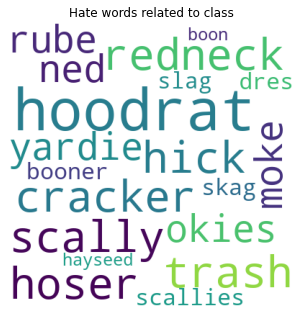

In [ ]:
# Draw wordcloud from the hate words that appear in class category
draw_wordcloud(list(sorted_hate_class.keys()),"Hate words related to class")

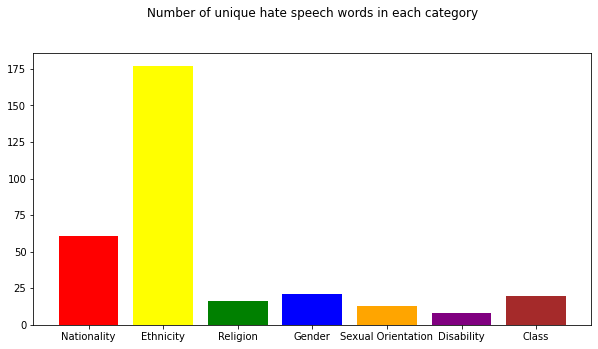

In [ ]:
# Creating a bar chart to depict the number of unique terminologies used for each category in our dataset
# representing categories in x axis
categories = ["Nationality", "Ethnicity", "Religion", "Gender", "Sexual Orientation", "Disability", "Class"]
# representing unique hate word counts in y axis
unique_term_no = [len(list(sorted_hate_nationality.keys())), len(list(sorted_hate_ethnicity.keys())),
                  len(list(sorted_hate_religion.keys())), len(list(sorted_hate_gender.keys())),
                  len(list(sorted_hate_sexual_orientation.keys())), len(list(sorted_hate_disability.keys())),
                  len(list(sorted_hate_class.keys()))]
colors = ['red', 'yellow', 'green', 'blue', 'orange', 'purple', 'brown']
 
#bar plot
plt.figure(figsize = (10, 5), facecolor = None)
plt.bar(categories, height = unique_term_no, color = colors)
plt.title("Number of unique hate speech words in each category\n\n")
plt.show()

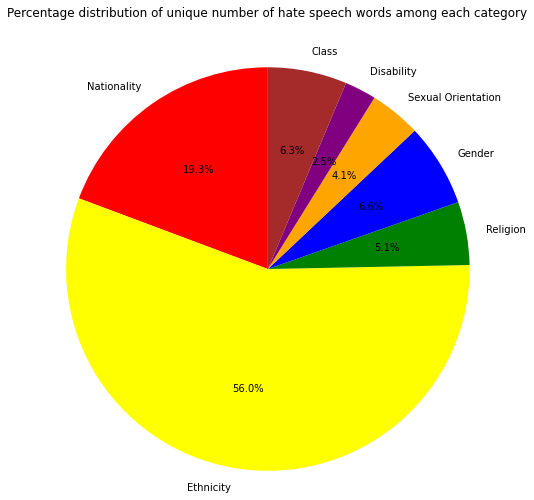

In [ ]:
# Creating a pie chart to show the percentage distribution of the number of unique terminologies used among each category in our dataset
# representing categories in x axis
categories = ["Nationality", "Ethnicity", "Religion", "Gender", "Sexual Orientation", "Disability", "Class"]
# representing unique hate word counts in y axis
unique_term_no = [len(list(sorted_hate_nationality.keys())), len(list(sorted_hate_ethnicity.keys())),
                  len(list(sorted_hate_religion.keys())), len(list(sorted_hate_gender.keys())),
                  len(list(sorted_hate_sexual_orientation.keys())), len(list(sorted_hate_disability.keys())),
                  len(list(sorted_hate_class.keys()))]
colors = ['red', 'yellow', 'green', 'blue', 'orange', 'purple', 'brown']
 
#pie plot
plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Percentage distribution of unique number of hate speech words among each category\n\n")
plt.pie(unique_term_no,labels=categories, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

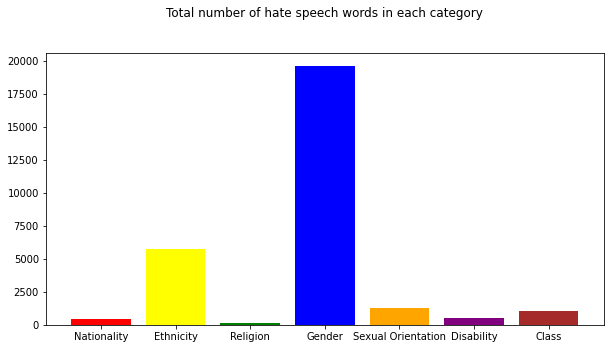

In [ ]:
# Creating a bar chart to depict the number of total terminologies used for each category in our dataset
# representing categories in x axis
categories = ["Nationality", "Ethnicity", "Religion", "Gender", "Sexual Orientation", "Disability", "Class"]
# representing total hate word count in y axis
total_term_no = [sum(list(sorted_hate_nationality.values())), sum(list(sorted_hate_ethnicity.values())),
                  sum(list(sorted_hate_religion.values())), sum(list(sorted_hate_gender.values())),
                  sum(list(sorted_hate_sexual_orientation.values())), sum(list(sorted_hate_disability.values())),
                  sum(list(sorted_hate_class.values()))]
colors = ['red', 'yellow', 'green', 'blue', 'orange', 'purple', 'brown']
 
#bar plot
plt.figure(figsize = (10, 5), facecolor = None)
plt.bar(categories, height = total_term_no, color = colors)
plt.title("Total number of hate speech words in each category\n\n")
plt.show()

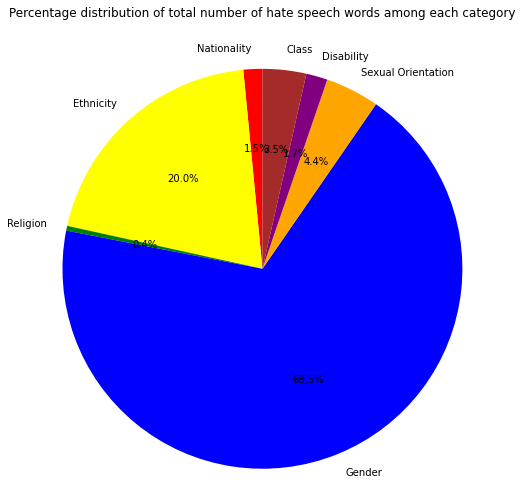

In [ ]:
# Creating a pie chart to show the percentage distribution of the total number of terminologies used among each category in our dataset
# representing categories in x axis
categories = ["Nationality", "Ethnicity", "Religion", "Gender", "Sexual Orientation", "Disability", "Class"]
# representing total hate word count in y axis
total_term_no = [sum(list(sorted_hate_nationality.values())), sum(list(sorted_hate_ethnicity.values())),
                  sum(list(sorted_hate_religion.values())), sum(list(sorted_hate_gender.values())),
                  sum(list(sorted_hate_sexual_orientation.values())), sum(list(sorted_hate_disability.values())),
                  sum(list(sorted_hate_class.values()))]
colors = ['red', 'yellow', 'green', 'blue', 'orange', 'purple', 'brown']
 
#pie plot
plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Percentage distribution of total number of hate speech words among each category\n\n")
plt.pie(total_term_no,labels=categories, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

CREATING A HATE DATAFRAME FOR CATEGORIZING HATE SPEECHES ACCORDING TO ABOVE CATEGORIES

In [ ]:
# retrieving data that contains all the hate speech 
hate_df = df[df['Toxicity'] == 1]
hate_df

,Unnamed: 0,Toxicity,tweet,clean_tweet
13,13,1,@user #cnn calls #michigan middle school 'buil...,call middle school build wall chant
14,14,1,no comment! in #australia #opkillingbay #se...,comment
17,17,1,retweet if you agree!,retweet agree
23,23,1,@user @user lumpy says i am a . prove it lumpy.,lumpy say prove lumpy
34,34,1,it's unbelievable that in the 21st century we'...,unbelievable 21st century wed need something like
...,...,...,...,...
56739,56739,1,you're such a retard i hope you get type 2 dia...,youre retard hope get type diabetes die sugar ...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous muthaf lie right trash mine bible scriptu...
56741,56741,1,"you've gone and broke the wrong heart baby, an...",youve gone broke wrong heart baby drove rednec...
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan eat dat nigguh like aint fuckin...


In [ ]:
# create new column hate_category and initialize it to -1
hate_df["hate_category"] = [-1] * len(hate_df)
hate_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Toxicity,tweet,clean_tweet,hate_category
13,13,1,@user #cnn calls #michigan middle school 'buil...,call middle school build wall chant,-1
14,14,1,no comment! in #australia #opkillingbay #se...,comment,-1
17,17,1,retweet if you agree!,retweet agree,-1
23,23,1,@user @user lumpy says i am a . prove it lumpy.,lumpy say prove lumpy,-1
34,34,1,it's unbelievable that in the 21st century we'...,unbelievable 21st century wed need something like,-1
...,...,...,...,...,...
56739,56739,1,you're such a retard i hope you get type 2 dia...,youre retard hope get type diabetes die sugar ...,-1
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous muthaf lie right trash mine bible scriptu...,-1
56741,56741,1,"you've gone and broke the wrong heart baby, an...",youve gone broke wrong heart baby drove rednec...,-1
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan eat dat nigguh like aint fuckin...,-1


In [ ]:
# method to retrieve the most dominant hate category(categories if multiple)
def retrieve_hate_category(hate_dict):
  # Find item with Max Value in Dictionary
  item_max_value = max(hate_dict.items(), key=lambda x: x[1])
  keys_list = list()
  # iterate over all the times in dictionary to find keys with max value
  for key,value in hate_dict.items():
    if value == item_max_value[1]:
      keys_list.append(key)
  return keys_list

In [ ]:
# creating a dataframe which contains tweets of hate speech that are further categorized into 7 different categories
categorized_df = pd.DataFrame(columns = ['tweet', 'category'])
# create dict to store categories as keys and their occurance as values for each tweet
init_dict = {'nationality': 0, 'ethnicity': 0, 'religion': 0, 'gender': 0, 'sexual_orientation': 0, 'disability': 0, 'class': 0}
for tweet in hate_df['clean_tweet']:
  # creating temporary dictionaries for each tweet to store number of hate words in each category
  #print("tweet: ", tweet)
  temp_dict = {'nationality': 0, 'ethnicity': 0, 'religion': 0, 'gender': 0, 'sexual_orientation': 0, 'disability': 0, 'class': 0}
  # tokenize tweets into words
  words = word_tokenize(tweet)
  for word in words:
    # check if the word is in hate nationality list
    if word in list(sorted_hate_nationality.keys()):
      temp_dict['nationality'] += 1
    # check if the word is in hate ethnicity list
    if word in list(sorted_hate_ethnicity.keys()):
      temp_dict['ethnicity'] += 1
    # check if the word is in hate religion list
    if word in list(sorted_hate_religion.keys()):
      temp_dict['religion'] += 1
    # check if the word is in hate gender list
    if word in list(sorted_hate_gender.keys()):
      temp_dict['gender'] += 1
    # check if the word is in hate sexual orientation list
    if word in list(sorted_hate_sexual_orientation.keys()):
      temp_dict['sexual_orientation'] += 1
    # check if the word is in hate disability list
    if word in list(sorted_hate_disability.keys()):
      temp_dict['disability'] += 1
    # check if the word is in hate class list
    if word in list(sorted_hate_class.keys()):
      temp_dict['class'] += 1
  #print(temp_dict)
  # check if dictionary is empty
  if temp_dict != init_dict:
    category = retrieve_hate_category(temp_dict)
    # making sure only one category is dominant in the dictionary 
    if len(category) == 1:
      # enumerization of categories as labels for the categorized dictionary (0 = nationality, 1 = ethnicity, 2 = religion, 3 = gender, 4 = sexual orientation, 5 = disability, 6 = class)
      if category[0] == 'nationality':
        categorized_df = categorized_df.append({'tweet': tweet, 'category': 0}, ignore_index=True)
      elif category[0] == 'ethnicity':
        categorized_df = categorized_df.append({'tweet': tweet, 'category': 1}, ignore_index=True)
      elif category[0] == 'religion':
        categorized_df = categorized_df.append({'tweet': tweet, 'category': 2}, ignore_index=True)
      elif category[0] == 'gender':
        categorized_df = categorized_df.append({'tweet': tweet, 'category': 3}, ignore_index=True)
      elif category[0] == 'sexual_orientation':
        categorized_df = categorized_df.append({'tweet': tweet, 'category': 4}, ignore_index=True)
      elif category[0] == 'disability':
        categorized_df = categorized_df.append({'tweet': tweet, 'category': 5}, ignore_index=True)
      elif category[0] == 'religion':
        categorized_df = categorized_df.append({'tweet': tweet, 'category': 6}, ignore_index=True)

In [ ]:
# printing categorized dataframe that contains categories for each hate speech
print("Categorized dataset generated from hate speech tweets")
print("(0 = nationality, 1 = ethnicity, 2 = religion, 3 = gender, 4 = sexual orientation, 5 = disability, 6 = class)")
categorized_df

Categorized dataset generated from hate speech tweets
(0 = nationality, 1 = ethnicity, 2 = religion, 3 = gender, 4 = sexual orientation, 5 = disability, 6 = class)


,tweet,category
0,might libtard,5
1,might libtard,5
2,pic say otherwise young girl confined kitchen ...,3
3,youre blocked troll promise amp let nonsensica...,1
4,girl world sexy mature housewife,3
...,...,...
18633,really care bout dis bitch dick feeling,3
18634,worried bout bitch need,3
18635,youre nigger,1
18636,young buck wan eat dat nigguh like aint fuckin...,1


In [ ]:
# table to show number of tweets for each hate speech category
categorized_df0 = categorized_df[categorized_df['category'] == 0]
categorized_df1 = categorized_df[categorized_df['category'] == 1]
categorized_df2 = categorized_df[categorized_df['category'] == 2]
categorized_df3 = categorized_df[categorized_df['category'] == 3]
categorized_df4 = categorized_df[categorized_df['category'] == 4]
categorized_df5 = categorized_df[categorized_df['category'] == 5]
categorized_df6 = categorized_df[categorized_df['category'] == 6]
d = {
    'Nationality' : [len(categorized_df0)],
    'Ethnicity': [len(categorized_df1)],
    'Religion': [len(categorized_df2)],
    'Gender' : [len(categorized_df3)],
    'Sexual Orientation': [len(categorized_df4)],
    'Disability': [len(categorized_df5)],
    'Class': [len(categorized_df6)]
     }
categorized_hate_df = pd.DataFrame(data=d)
categorized_hate_df

,Nationality,Ethnicity,Religion,Gender,Sexual Orientation,Disability,Class
0,117,2232,31,15048,785,425,0


FEATURE EXTRACTION USING TF-IDF

In [ ]:
# import libraries for tfidf implementation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
## putting clean tweets and labels into numpy array for vectorization
np_tweets = df['clean_tweet'].to_numpy()
np_labels = df['Toxicity'].to_numpy()
print(np_tweets)
print(np_labels)

['father dysfunctional selfish drag kid dysfunction'
 'thanks credit cant use cause dont offer wheelchair van pdx'
 'bihday majesty' ... 'young buck wan eat dat nigguh like aint fuckin dis'
 'youu got wild bitch tellin lie'
 'ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp white coll']
[0 0 0 ... 1 1 0]


In [ ]:
# implementing tf-idf on clean tweets to create vectors for classifiers
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(np_tweets)
vectorizer.get_feature_names_out()

array(['000', '0000000000000', '000001', ..., 'zzzzzz', 'zzzzzzs',
       'zzzzzzzz'], dtype=object)

In [ ]:
# splitting data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, np_labels, test_size=0.2, random_state=0)

IMPLEMENTATION OF MACHINE LEARNING ALGORITHMS FOR CLASSIFICATION OF HATE SPEECH DATA USING TF-IDF

In [ ]:
# libraries for machine learning classifier implementations
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics,utils
# for confusion matrix
import seaborn as sns

In [ ]:
%%time
print("Measuring time taken to execute TF-IDF based support vector machine classifier:")
print("--------------------------------------------------")
#Create a Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')

#Train the model using the training sets
svm_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_classifier.predict(X_test)

Measuring time taken to execute TF-IDF based support vector machine classifier:
--------------------------------------------------
CPU times: user 1min 59s, sys: 386 ms, total: 2min
Wall time: 2min


In [ ]:
# printing the accuracy,precision,recall and f1-score of svm classifier
print("Performance metrics of support vector machine classifier on hate-speech detection using TF-IDF vectorization: ")
print("--------------------------------------------------")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1-Score: ",metrics.f1_score(y_test, y_pred))
# generating a classification report for detailed performance metrics (precision, recall, f1-score)
target_names = ['Non-hate speech', 'Hate-speech']
print("--------------------------------------------------")
print("Classification report for TF-IDF based support vector machine classifier ")
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Performance metrics of support vector machine classifier on hate-speech detection using TF-IDF vectorization: 
--------------------------------------------------
Accuracy: 0.9374394219755044
Precision:  0.9653863331844573
Recall:  0.8862238622386224
F1-Score:  0.924112868747328
--------------------------------------------------
Classification report for TF-IDF based support vector machine classifier 
--------------------------------------------------
                 precision    recall  f1-score   support

Non-hate speech       0.92      0.98      0.95      6471
    Hate-speech       0.97      0.89      0.92      4878

       accuracy                           0.94     11349
      macro avg       0.94      0.93      0.94     11349
   weighted avg       0.94      0.94      0.94     11349



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

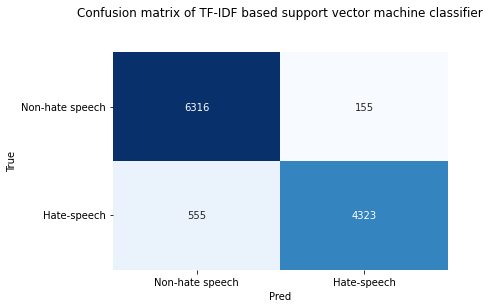

In [ ]:
# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=target_names, 
       yticklabels=target_names, title="Confusion matrix of TF-IDF based support vector machine classifier\n\n")
plt.yticks(rotation=0)

In [ ]:
%%time
print("Measuring time taken to execute TF-IDF based logistic regression classifier:")
print("--------------------------------------------------")
#Create a Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=0)

#Train the model using the training sets
lr_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = lr_classifier.predict(X_test)

Measuring time taken to execute TF-IDF based logistic regression classifier:
--------------------------------------------------
CPU times: user 1.19 s, sys: 1.62 s, total: 2.81 s
Wall time: 1.47 s


In [ ]:
# printing the accuracy,precision,recall and f1-score of lr classifier
print("Performance metrics of logistic regression classifier on hate-speech detection using TF-IDF vectorization: ")
print("--------------------------------------------------")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1-Score: ",metrics.f1_score(y_test, y_pred))
# generating a classification report for detailed performance metrics (precision, recall, f1-score)
target_names = ['Non-hate speech', 'Hate-speech']
print("--------------------------------------------------")
print("Classification report for TF-IDF based logistic regression classifier ")
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Performance metrics of logistic regression classifier on hate-speech detection using TF-IDF vectorization: 
--------------------------------------------------
Accuracy: 0.9297735483302494
Precision:  0.9704865114134195
Recall:  0.8628536285362853
F1-Score:  0.9135105805751492
--------------------------------------------------
Classification report for TF-IDF based logistic regression classifier 
--------------------------------------------------
                 precision    recall  f1-score   support

Non-hate speech       0.90      0.98      0.94      6471
    Hate-speech       0.97      0.86      0.91      4878

       accuracy                           0.93     11349
      macro avg       0.94      0.92      0.93     11349
   weighted avg       0.93      0.93      0.93     11349



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

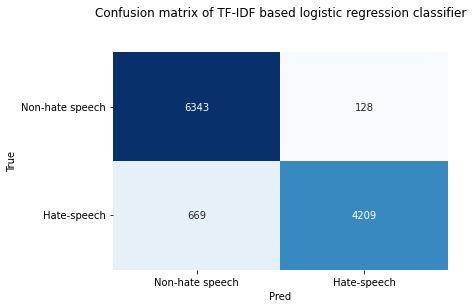

In [ ]:
# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=target_names, 
       yticklabels=target_names, title="Confusion matrix of TF-IDF based logistic regression classifier\n\n")
plt.yticks(rotation=0)

In [ ]:
%%time
print("Measuring time taken to execute TF-IDF based random forest classifier:")
print("--------------------------------------------------")
#Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

#Train the model using the training sets
rf_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf_classifier.predict(X_test)

Measuring time taken to execute TF-IDF based random forest classifier:
--------------------------------------------------
CPU times: user 2min 48s, sys: 123 ms, total: 2min 48s
Wall time: 2min 47s


In [ ]:
# printing the accuracy,precision,recall and f1-score of rf classifier
print("Performance metrics of random forest classifier on hate-speech detection using TF-IDF vectorization: ")
print("--------------------------------------------------")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1-Score: ",metrics.f1_score(y_test, y_pred))
# generating a classification report for detailed performance metrics (precision, recall, f1-score)
target_names = ['Non-hate speech', 'Hate-speech']
print("--------------------------------------------------")
print("Classification report for TF-IDF based random forest classifier ")
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Performance metrics of random forest classifier on hate-speech detection using TF-IDF vectorization: 
--------------------------------------------------
Accuracy: 0.9406996211119922
Precision:  0.9497326203208556
Recall:  0.9102091020910209
F1-Score:  0.9295509264105516
--------------------------------------------------
Classification report for TF-IDF based random forest classifier 
--------------------------------------------------
                 precision    recall  f1-score   support

Non-hate speech       0.93      0.96      0.95      6471
    Hate-speech       0.95      0.91      0.93      4878

       accuracy                           0.94     11349
      macro avg       0.94      0.94      0.94     11349
   weighted avg       0.94      0.94      0.94     11349



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

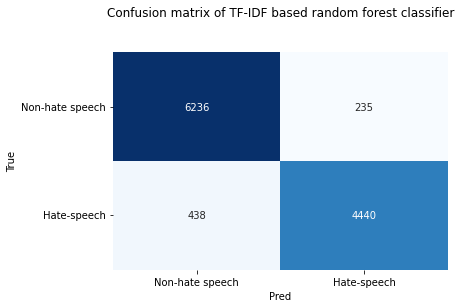

In [ ]:
# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=target_names, 
       yticklabels=target_names, title="Confusion matrix of TF-IDF based random forest classifier\n\n")
plt.yticks(rotation=0)

FEATURE EXTRACTION USING WORD2VEC

In [ ]:
# installing gensim library for implementing word2vec
!pip install --upgrade gensim
import gensim

In [ ]:
# printing dataframe once again
df = pd.read_csv('hate_speech_dataset.csv')
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [ ]:
# Clean data using the built in cleaner in gensim
df['clean_tweet'] = df['tweet'].apply(lambda x: gensim.utils.simple_preprocess(x))
df.head()

,Unnamed: 0,Toxicity,tweet,clean_tweet
0,0,0,@user when a father is dysfunctional and is s...,"[user, when, father, is, dysfunctional, and, i..."
1,1,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, for, lyft, credit, can, u..."
2,2,0,bihday your majesty,"[bihday, your, majesty]"
3,3,0,#model i love u take with u all the time in ...,"[model, love, take, with, all, the, time, in, ..."
4,4,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_tweet'], df['Toxicity'] , test_size=0.2)

In [ ]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train, vector_size=100, window=5, min_count=2)

In [ ]:
words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

:IMPLEMENTATION OF MACHINE LEARNING ALGORITHMS FOR CLASSIFICATION OF HATE SPEECH DATA USING WORD2VEC

In [ ]:
%%time
print("Measuring time taken to execute Word2Vec based support vector machine classifier:")
print("--------------------------------------------------")
#Create a Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')

#Train the model using the training sets
svm_classifier.fit(X_train_vect_avg, y_train)

#Predict the response for test dataset
y_pred = svm_classifier.predict(X_test_vect_avg)

Measuring time taken to execute Word2Vec based support vector machine classifier:
--------------------------------------------------
CPU times: user 1min 42s, sys: 426 ms, total: 1min 43s
Wall time: 1min 47s


In [ ]:
# printing the accuracy,precision,recall and f1-score of svm classifier
print("Performance metrics of support vector machine classifier on hate-speech detection using Word2Vec vectorization: ")
print("--------------------------------------------------")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1-Score: ",metrics.f1_score(y_test, y_pred))
# generating a classification report for detailed performance metrics (precision, recall, f1-score)
target_names = ['Non-hate speech', 'Hate-speech']
print("--------------------------------------------------")
print("Classification report for Word2Vec based support vector machine classifier ")
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Performance metrics of support vector machine classifier on hate-speech detection using Word2Vec vectorization: 
--------------------------------------------------
Accuracy: 0.8960260815930919
Precision:  0.9292596944770858
Recall:  0.8181253879577902
F1-Score:  0.8701584507042254
--------------------------------------------------
Classification report for TF-IDF based support vector machine classifier 
--------------------------------------------------
                 precision    recall  f1-score   support

Non-hate speech       0.88      0.95      0.91      6516
    Hate-speech       0.93      0.82      0.87      4833

       accuracy                           0.90     11349
      macro avg       0.90      0.89      0.89     11349
   weighted avg       0.90      0.90      0.89     11349



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

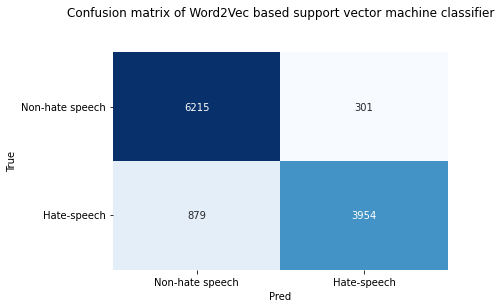

In [ ]:
# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=target_names, 
       yticklabels=target_names, title="Confusion matrix of Word2Vec based support vector machine classifier\n\n")
plt.yticks(rotation=0)

In [ ]:
%%time
print("Measuring time taken to execute Word2Vec based logistic regression classifier:")
print("--------------------------------------------------")
#Create a Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=0)

#Train the model using the training sets
lr_classifier.fit(X_train_vect_avg, y_train)

#Predict the response for test dataset
y_pred = lr_classifier.predict(X_test_vect_avg)

Measuring time taken to execute Word2Vec based logistic regression classifier:
--------------------------------------------------
CPU times: user 2.21 s, sys: 532 ms, total: 2.75 s
Wall time: 3.01 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# printing the accuracy,precision,recall and f1-score of lr classifier
print("Performance metrics of logistic regression classifier on hate-speech detection using Word2Vec vectorization: ")
print("--------------------------------------------------")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1-Score: ",metrics.f1_score(y_test, y_pred))
# generating a classification report for detailed performance metrics (precision, recall, f1-score)
target_names = ['Non-hate speech', 'Hate-speech']
print("--------------------------------------------------")
print("Classification report for Word2Vec based logistic regression classifier ")
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Performance metrics of logistic regression classifier on hate-speech detection using Word2Vec vectorization: 
--------------------------------------------------
Accuracy: 0.8926777689664288
Precision:  0.9093997734994338
Recall:  0.8307469480653839
F1-Score:  0.8682958477508651
--------------------------------------------------
Classification report for Word2Vec based logistic regression classifier 
--------------------------------------------------
                 precision    recall  f1-score   support

Non-hate speech       0.88      0.94      0.91      6516
    Hate-speech       0.91      0.83      0.87      4833

       accuracy                           0.89     11349
      macro avg       0.90      0.88      0.89     11349
   weighted avg       0.89      0.89      0.89     11349



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

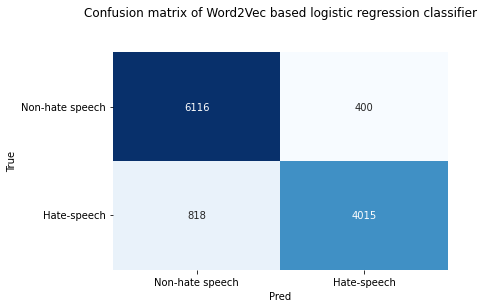

In [ ]:
# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=target_names, 
       yticklabels=target_names, title="Confusion matrix of Word2Vec based logistic regression classifier\n\n")
plt.yticks(rotation=0)

In [ ]:
%%time
print("Measuring time taken to execute Word2Vec based random forest classifier:")
print("--------------------------------------------------")
#Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

#Train the model using the training sets
rf_classifier.fit(X_train_vect_avg, y_train)

#Predict the response for test dataset
y_pred = rf_classifier.predict(X_test_vect_avg)

Measuring time taken to execute Word2Vec based random forest classifier:
--------------------------------------------------
CPU times: user 1min 4s, sys: 60.9 ms, total: 1min 4s
Wall time: 1min 5s


In [ ]:
# printing the accuracy,precision,recall and f1-score of rf classifier
print("Performance metrics of random forest classifier on hate-speech detection using Word2Vec vectorization: ")
print("--------------------------------------------------")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1-Score: ",metrics.f1_score(y_test, y_pred))
# generating a classification report for detailed performance metrics (precision, recall, f1-score)
target_names = ['Non-hate speech', 'Hate-speech']
print("--------------------------------------------------")
print("Classification report for Word2Vec based random forest classifier ")
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Performance metrics of random forest classifier on hate-speech detection using Word2Vec vectorization: 
--------------------------------------------------
Accuracy: 0.9021059124151908
Precision:  0.9154017857142858
Recall:  0.8485412787088765
F1-Score:  0.8807043917105123
--------------------------------------------------
Classification report for Word2Vec based random forest classifier 
--------------------------------------------------
                 precision    recall  f1-score   support

Non-hate speech       0.89      0.94      0.92      6516
    Hate-speech       0.92      0.85      0.88      4833

       accuracy                           0.90     11349
      macro avg       0.90      0.90      0.90     11349
   weighted avg       0.90      0.90      0.90     11349



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

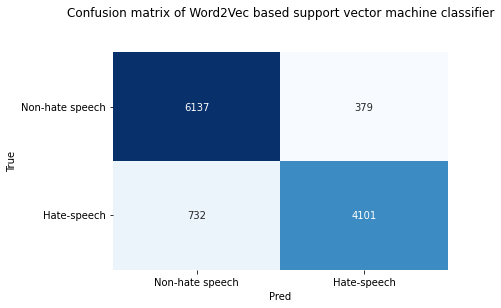

In [ ]:
# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=target_names, 
       yticklabels=target_names, title="Confusion matrix of Word2Vec based support vector machine classifier\n\n")
plt.yticks(rotation=0)

FEATURE EXTRACTION USING DOC2VEC

In [ ]:
# libraries for doc2vec implementation
import multiprocessing
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
#from gensim.models import Word2Vec
from gensim.models.doc2vec import TaggedDocument

In [ ]:
# split data 80-20 into training and testing
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# tokenize words in each sentence
def tokenize_text(text):
    tokens = []
    for sent in sent_tokenize(text):
        for word in word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [ ]:
# tag train and test data with corresponding labels so each tweet(document) would be associated with a label
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['clean_tweet']), tags=[r.Toxicity]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['clean_tweet']), tags=[r.Toxicity]), axis=1)

In [ ]:
train_tagged

33047    ([woman, slut, freshman, year, college, let, h...
44206    ([kip, tokuda, yellow, guy, working, niggerize...
5260                                   ([laugh, amp], [0])
52825    ([si, said, sleep, said, bitch, day, aint, sle...
8952                           ([dont, wish, though], [0])
                               ...                        
54343    ([ummm, happy, fairy, apparently, took, crap, ...
38158    ([least, put, caption, stealing, pic, fag, lol...
860      ([black, professor, make, assumption, entire, ...
15795                           ([total, trash, amp], [0])
56422                         ([sorry, wrong, bitch], [1])
Length: 45396, dtype: object

In [ ]:
# Distributed Bag of Words Implementation
cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 45396/45396 [00:00<00:00, 1813325.57it/s]


In [ ]:
%%time
# Initializing the dbow model and run for 30 epochs
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 45396/45396 [00:00<00:00, 2279148.50it/s]


CPU times: user 1min 17s, sys: 15.2 s, total: 1min 33s
Wall time: 1min 2s


In [ ]:
# Building the Final Vector Feature for the Classifiers
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [ ]:
# Training classifiers by using distributed bag-of-words approach of doc2vec
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

IMPLEMENTATION OF MACHINE LEARNING ALGORITHMS FOR CLASSIFICATION OF HATE SPEECH DATA USING DOC2VEC

In [ ]:
%%time
print("Measuring time taken to execute Doc2Vec based support vector machine classifier:")
print("--------------------------------------------------")
#Create a Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')

#Train the model using the training sets
svm_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_classifier.predict(X_test)

Measuring time taken to execute Doc2Vec based support vector machine classifier:
--------------------------------------------------
CPU times: user 9min 3s, sys: 376 ms, total: 9min 3s
Wall time: 9min 1s


In [ ]:
# printing the accuracy,precision,recall and f1-score of svm classifier
print("Performance metrics of support vector machine classifier on hate-speech detection using Doc2Vec vectorization: ")
print("--------------------------------------------------")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1-Score: ",metrics.f1_score(y_test, y_pred))
# generating a classification report for detailed performance metrics (precision, recall, f1-score)
target_names = ['Non-hate speech', 'Hate-speech']
print("--------------------------------------------------")
print("Classification report for Doc2Vec based support vector machine classifier ")
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Performance metrics of support vector machine classifier on hate-speech detection using Doc2Vec vectorization: 
--------------------------------------------------
Accuracy: 0.6967133668164596
Precision:  0.6602635693544785
Recall:  0.6061103137174493
F1-Score:  0.6320290784691042
--------------------------------------------------
Classification report for Doc2Vec based support vector machine classifier 
--------------------------------------------------
                 precision    recall  f1-score   support

Non-hate speech       0.72      0.76      0.74      6472
    Hate-speech       0.66      0.61      0.63      4877

       accuracy                           0.70     11349
      macro avg       0.69      0.69      0.69     11349
   weighted avg       0.69      0.70      0.69     11349



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

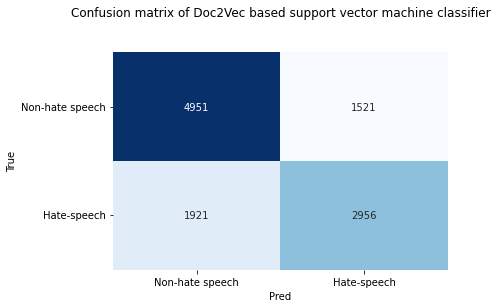

In [ ]:
# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=target_names, 
       yticklabels=target_names, title="Confusion matrix of Doc2Vec based support vector machine classifier\n\n")
plt.yticks(rotation=0)

In [ ]:
%%time
print("Measuring time taken to execute Doc2Vec based logistic regression classifier:")
print("--------------------------------------------------")
#Create a Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=0)

#Train the model using the training sets
lr_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = lr_classifier.predict(X_test)

Measuring time taken to execute Doc2Vec based logistic regression classifier:
--------------------------------------------------
CPU times: user 1.7 s, sys: 265 ms, total: 1.96 s
Wall time: 1.06 s


In [ ]:
# printing the accuracy,precision,recall and f1-score of lr classifier
print("Performance metrics of logistic regression classifier on hate-speech detection using Doc2Vec vectorization: ")
print("--------------------------------------------------")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1-Score: ",metrics.f1_score(y_test, y_pred))
# generating a classification report for detailed performance metrics (precision, recall, f1-score)
target_names = ['Non-hate speech', 'Hate-speech']
print("--------------------------------------------------")
print("Classification report for Doc2Vec based logistic regression classifier ")
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Performance metrics of logistic regression classifier on hate-speech detection using Doc2Vec vectorization: 
--------------------------------------------------
Accuracy: 0.6958322319147061
Precision:  0.6643598615916955
Recall:  0.5905269632971089
F1-Score:  0.6252713851498046
--------------------------------------------------
Classification report for Doc2Vec based logistic regression classifier 
--------------------------------------------------
                 precision    recall  f1-score   support

Non-hate speech       0.72      0.78      0.74      6472
    Hate-speech       0.66      0.59      0.63      4877

       accuracy                           0.70     11349
      macro avg       0.69      0.68      0.68     11349
   weighted avg       0.69      0.70      0.69     11349



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

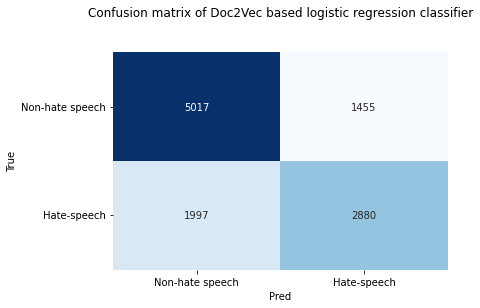

In [ ]:
# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=target_names, 
       yticklabels=target_names, title="Confusion matrix of Doc2Vec based logistic regression classifier\n\n")
plt.yticks(rotation=0)

In [ ]:
%%time
print("Measuring time taken to execute Doc2Vec based random forest classifier:")
print("--------------------------------------------------")
#Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

#Train the model using the training sets
rf_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf_classifier.predict(X_test)

Measuring time taken to execute Doc2Vec based random forest classifier:
--------------------------------------------------
CPU times: user 1min 45s, sys: 69.3 ms, total: 1min 45s
Wall time: 1min 44s


In [ ]:
# printing the accuracy,precision,recall and f1-score of rf classifier
print("Performance metrics of random forest classifier on hate-speech detection using Doc2Vec vectorization: ")
print("--------------------------------------------------")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1-Score: ",metrics.f1_score(y_test, y_pred))
# generating a classification report for detailed performance metrics (precision, recall, f1-score)
target_names = ['Non-hate speech', 'Hate-speech']
print("--------------------------------------------------")
print("Classification report for Doc2Vec based random forest classifier ")
print("--------------------------------------------------")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Performance metrics of random forest classifier on hate-speech detection using Doc2Vec vectorization: 
--------------------------------------------------
Accuracy: 0.7086968014803067
Precision:  0.6802018811654049
Recall:  0.6079557104777528
F1-Score:  0.6420528367258554
--------------------------------------------------
Classification report for Doc2Vec based random forest classifier 
--------------------------------------------------
                 precision    recall  f1-score   support

Non-hate speech       0.73      0.78      0.75      6472
    Hate-speech       0.68      0.61      0.64      4877

       accuracy                           0.71     11349
      macro avg       0.70      0.70      0.70     11349
   weighted avg       0.71      0.71      0.71     11349



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

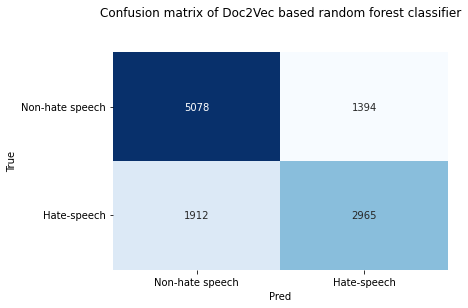

In [ ]:
# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=target_names, 
       yticklabels=target_names, title="Confusion matrix of Doc2Vec based random forest classifier\n\n")
plt.yticks(rotation=0)

UTILIZING BERT FOR HATE SPEECH CLASSIFICATION

In [ ]:
# importing libraries for implemeneting bert
!pip install transformers
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time

# specify GPU (enabled gpu for implmeneting bert in order to speed up the process)
device = torch.device("cuda")

     |████████████████████████████████| 4.0 MB 4.3 MB/s 
     |████████████████████████████████| 596 kB 27.7 MB/s 
     |████████████████████████████████| 895 kB 34.2 MB/s 
     |████████████████████████████████| 6.6 MB 36.4 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# creating dataframe from the dataset
df = pd.read_csv('hate_speech_dataset.csv')
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [ ]:
# function to preprocess given tweet (it is slightly different than previous preprocess function since bert doesn't require a full-scale preprocessing)
def bert_preprocess_tweet(tweet):
  # lowercasing all the letters
  result = tweet.lower()
  # # to avoid removing contractions in english
  # result = re.sub("'", "", result)
  # removing hashtags and mentions
  result = re.sub("@[A-Za-z0-9_]+","", result)
  #result = re.sub("#[A-Za-z0-9_]+","", result)
  result = re.sub("#","", result)
  # removing links
  result = re.sub(r'http\S+', '', result)
  result = re.sub(r"www.\S+", "", result)
  # removing punctuations
  result = re.sub('[()!?]', ' ', result)
  result = re.sub('\[.*?\]',' ', result)
  # removing non-alphanumeric characters
  result = re.sub("[^a-z0-9']"," ", result)
  # removing extra space
  result = re.sub("\s\s+", " ", result)
  result = re.sub('^\s+|\s+$', "", result)
  # # tokenization
  # result = word_tokenize(result)
  # # removing stopwords, one letter words and stem the resulting words using lemmatizer
  # #result = [PorterStemmer().stem(w) for w in result if not w in stop_words and len(w) > 2]
  # result = [WordNetLemmatizer().lemmatize(w) for w in result if not w in stop_words and len(w) > 2]
  # # detokenization
  # result = " ".join(word for word in result)
  return result

In [ ]:
# adding clean tweets to dataframe
clean_tweet = []
for i in range(len(df)):
  clean_tweet.append(bert_preprocess_tweet(df['tweet'][i]))

df['clean_tweet'] = clean_tweet
df.head()

,Unnamed: 0,Toxicity,tweet,clean_tweet
0,0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause they ...
2,2,0,bihday your majesty,bihday your majesty
3,3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,4,0,factsguide: society now #motivation,factsguide society now motivation


USING HUGGINGFACE TRANSFORMERS TO FINE-TUNE BERT ON CLASSIFICATION

In [ ]:
# huggingface transformer libraries
!pip install transformers
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import random

In [ ]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

In [ ]:
set_seed(1)

In [ ]:
# importing google drive to save models
from google.colab import drive
drive.mount('/content/drive')
drive.flush_and_unmount

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<function google.colab.drive.flush_and_unmount>

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
# split data into 80% training and 20% test
train_text, valid_text, train_labels, valid_labels = train_test_split(df['clean_tweet'].tolist(),df['Toxicity'].tolist(),test_size=0.2)

In [ ]:
# print out lengths of train and test sets
print(len(train_text), len(train_labels))
print(len(valid_text), len(valid_labels))

45396 45396
11349 11349


In [ ]:
# generating hate speech dataset class to initialize pytorch based neural network model
class HateSpeechDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

TRAINING AND TESTING BERT BASE MODEL

In [ ]:
# # the model we gonna train, base uncased BERT
# # check text classification models here: https://huggingface.co/models?filter=text-classification
# model_name = "bert-base-uncased"
# # max sequence length for each document/sentence sample
# max_length = 512

In [ ]:
# load the bert tokenizer
bert_tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", do_lower_case=True)

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a

In [ ]:
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = bert_tokenizer(train_text, truncation=True, padding=True, max_length=512)
valid_encodings = bert_tokenizer(valid_text, truncation=True, padding=True, max_length=512)

In [ ]:
# convert our tokenized data into a torch Dataset
train_dataset = HateSpeechDataset(train_encodings, train_labels)
valid_dataset = HateSpeechDataset(valid_encodings, valid_labels)

In [ ]:
# load the model and pass to CUDA
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to("cuda")

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# metrics to compute after training the model to measure the performance
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy,precision,recall and f1 scores using sklearn's function
  acc = metrics.accuracy_score(labels, preds)
  prec = metrics.precision_score(labels,preds)
  rec = metrics.recall_score(labels,preds)
  f1 = metrics.f1_score(labels,preds)
  
  return {
      'accuracy': acc,
      'precision': prec,
      'recall': rec,
      'f1 score': f1
  }

In [ ]:
bert_training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/CS 521/bert_results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    #warmup_steps=500,              # number of warmup steps for learning rate scheduler
    learning_rate=2e-5,            # initial learning rate for AdamW optimizer
    weight_decay=0.01,               # strength of weight decay
    logging_dir='/content/drive/MyDrive/CS 521/bert_logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=500,               # log & save weights each logging_steps
    save_steps=500,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [ ]:
bert_trainer = Trainer(
    model=bert_model,                         # the instantiated Transformers model to be trained
    args=bert_training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [ ]:
# train the model
bert_trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 45396
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4257


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 score
500,0.102500,0.149710,0.954357,0.955112,0.935029,0.944964
1000,0.088800,0.144944,0.951890,0.959006,0.924727,0.941554
1500,0.073200,0.190117,0.953917,0.954087,0.935029,0.944462
2000,0.049100,0.201494,0.952859,0.946856,0.940286,0.943559
2500,0.046900,0.204375,0.953036,0.945558,0.942178,0.943865
3000,0.037200,0.235043,0.952066,0.940586,0.945332,0.942953
3500,0.024700,0.253177,0.952507,0.944925,0.941548,0.943233
4000,0.019400,0.265207,0.952771,0.947793,0.939024,0.943388


***** Running Evaluation *****
  Num examples = 11349
  Batch size = 32
Saving model checkpoint to /content/drive/MyDrive/CS 521/bert_results/checkpoint-500
Configuration saved in /content/drive/MyDrive/CS 521/bert_results/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/CS 521/bert_results/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 11349
  Batch size = 32
Saving model checkpoint to /content/drive/MyDrive/CS 521/bert_results/checkpoint-1000
Configuration saved in /content/drive/MyDrive/CS 521/bert_results/checkpoint-1000/config.json
Model weights saved in /content/drive/MyDrive/CS 521/bert_results/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 11349
  Batch size = 32
Saving model checkpoint to /content/drive/MyDrive/CS 521/bert_results/checkpoint-1500
Configuration saved in /content/drive/MyDrive/CS 521/bert_results/checkpoint-1500/config.json
Model weights saved in /content/drive/MyDrive/C

TrainOutput(global_step=4257, training_loss=0.053390020043854985, metrics={'train_runtime': 6148.0877, 'train_samples_per_second': 22.151, 'train_steps_per_second': 0.692, 'total_flos': 1.693648741129488e+16, 'train_loss': 0.053390020043854985, 'epoch': 3.0})

In [ ]:
# evaluate the current model after training
bert_trainer.evaluate()

***** Running Evaluation *****
  Num examples = 11349
  Batch size = 32


{'epoch': 3.0,
 'eval_accuracy': 0.9518900343642611,
 'eval_f1 score': 0.9415542710340398,
 'eval_loss': 0.14494407176971436,
 'eval_precision': 0.959005669428696,
 'eval_recall': 0.924726661059714,
 'eval_runtime': 59.0091,
 'eval_samples_per_second': 192.326,
 'eval_steps_per_second': 6.016}

In [ ]:
# saving the fine tuned model & tokenizer
bert_model_path = "/content/drive/MyDrive/CS 521/bert+hatespeech"
bert_model.save_pretrained(bert_model_path)
bert_tokenizer.save_pretrained(bert_model_path)

Configuration saved in /content/drive/MyDrive/CS 521/bert+hatespeech/config.json
Model weights saved in /content/drive/MyDrive/CS 521/bert+hatespeech/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/CS 521/bert+hatespeech/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/CS 521/bert+hatespeech/special_tokens_map.json


('/content/drive/MyDrive/CS 521/bert+hatespeech/tokenizer_config.json',
 '/content/drive/MyDrive/CS 521/bert+hatespeech/special_tokens_map.json',
 '/content/drive/MyDrive/CS 521/bert+hatespeech/vocab.txt',
 '/content/drive/MyDrive/CS 521/bert+hatespeech/added_tokens.json',
 '/content/drive/MyDrive/CS 521/bert+hatespeech/tokenizer.json')

In [ ]:
# function to predict whether model achieves the classification task successfully
def get_prediction(text,tokenizer,model, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "non-hate speech",
        1: "hate speech"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [ ]:
# Example #1 (it is just an example for testing and showing the effectiveness of the model. No intention reflect any hateful opinions)
text = """
The Israelis are like crocodiles; the more you give them meat, they want more
"""
print(get_prediction(text,bert_tokenizer,bert_model,convert_to_label=True))

1


In [ ]:
# Example #2
text = """
Crocodiles are never full; the more you give them meat, they want more
"""
print(get_prediction(text,bert_tokenizer,bert_model,convert_to_label=True))

0


TRAINING AND TESTING HATEBERT MODEL

In [ ]:
# load the hatebert tokenizer
hatebert_tokenizer = BertTokenizerFast.from_pretrained("GroNLP/hateBERT", do_lower_case=True)

Downloading:   0%|          | 0.00/151 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

In [ ]:
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = hatebert_tokenizer(train_text, truncation=True, padding=True, max_length=512)
valid_encodings = hatebert_tokenizer(valid_text, truncation=True, padding=True, max_length=512)

In [ ]:
# convert our tokenized data into a torch Dataset
train_dataset = HateSpeechDataset(train_encodings, train_labels)
valid_dataset = HateSpeechDataset(valid_encodings, valid_labels)

In [ ]:
# load the model and pass to CUDA
hatebert_model = BertForSequenceClassification.from_pretrained("GroNLP/hateBERT", num_labels=2).to("cuda")

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at GroNLP/hateBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly

In [ ]:
hatebert_training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/CS 521/hatebert_results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    #warmup_steps=500,              # number of warmup steps for learning rate scheduler
    learning_rate=2e-5,            # initial learning rate for AdamW optimizer
    weight_decay=0.01,               # strength of weight decay
    logging_dir='/content/drive/MyDrive/CS 521/hatebert_logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=500,               # log & save weights each logging_steps
    save_steps=500,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [ ]:
hatebert_trainer = Trainer(
    model=hatebert_model,                         # the instantiated Transformers model to be trained
    args=hatebert_training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [ ]:
# train the model
hatebert_trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 45396
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4257


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 score
500,0.209300,0.145874,0.946603,0.957451,0.913162,0.934783
1000,0.155000,0.141199,0.948894,0.949225,0.927670,0.938324
1500,0.132200,0.151492,0.951273,0.948177,0.934819,0.941451
2000,0.100300,0.151649,0.951890,0.942971,0.942178,0.942575
2500,0.093200,0.153020,0.949599,0.930985,0.950168,0.940479
3000,0.081300,0.171159,0.952683,0.938839,0.948907,0.943846
3500,0.059600,0.182382,0.952683,0.940121,0.947435,0.943764
4000,0.052900,0.189094,0.953476,0.946934,0.941758,0.944339


***** Running Evaluation *****
  Num examples = 11349
  Batch size = 32
Saving model checkpoint to /content/drive/MyDrive/CS 521/hatebert_results/checkpoint-500
Configuration saved in /content/drive/MyDrive/CS 521/hatebert_results/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/CS 521/hatebert_results/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 11349
  Batch size = 32
Saving model checkpoint to /content/drive/MyDrive/CS 521/hatebert_results/checkpoint-1000
Configuration saved in /content/drive/MyDrive/CS 521/hatebert_results/checkpoint-1000/config.json
Model weights saved in /content/drive/MyDrive/CS 521/hatebert_results/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 11349
  Batch size = 32
Saving model checkpoint to /content/drive/MyDrive/CS 521/hatebert_results/checkpoint-1500
Configuration saved in /content/drive/MyDrive/CS 521/hatebert_results/checkpoint-1500/config.json
Model weights s

TrainOutput(global_step=4257, training_loss=0.10720065661038987, metrics={'train_runtime': 5925.3556, 'train_samples_per_second': 22.984, 'train_steps_per_second': 0.718, 'total_flos': 1.693648741129488e+16, 'train_loss': 0.10720065661038987, 'epoch': 3.0})

In [ ]:
# evaluate the current model after training
hatebert_trainer.evaluate()

***** Running Evaluation *****
  Num examples = 11349
  Batch size = 32


{'epoch': 3.0,
 'eval_accuracy': 0.9488941756982994,
 'eval_f1 score': 0.9383241173968524,
 'eval_loss': 0.14119882881641388,
 'eval_precision': 0.9492254733218589,
 'eval_recall': 0.9276703111858705,
 'eval_runtime': 57.298,
 'eval_samples_per_second': 198.07,
 'eval_steps_per_second': 6.196}

In [ ]:
# saving the fine tuned model & tokenizer
hatebert_model_path = "/content/drive/MyDrive/CS 521/hatebert+hatespeech"
hatebert_model.save_pretrained(hatebert_model_path)
hatebert_tokenizer.save_pretrained(hatebert_model_path)

Configuration saved in /content/drive/MyDrive/CS 521/hatebert+hatespeech/config.json
Model weights saved in /content/drive/MyDrive/CS 521/hatebert+hatespeech/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/CS 521/hatebert+hatespeech/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/CS 521/hatebert+hatespeech/special_tokens_map.json


('/content/drive/MyDrive/CS 521/hatebert+hatespeech/tokenizer_config.json',
 '/content/drive/MyDrive/CS 521/hatebert+hatespeech/special_tokens_map.json',
 '/content/drive/MyDrive/CS 521/hatebert+hatespeech/vocab.txt',
 '/content/drive/MyDrive/CS 521/hatebert+hatespeech/added_tokens.json',
 '/content/drive/MyDrive/CS 521/hatebert+hatespeech/tokenizer.json')

In [ ]:
# Example #1 (it is just an example for testing and showing the effectiveness of the model. No intention reflect any hateful opinions)
text = """
 
"""
print(get_prediction(text,hatebert_tokenizer,hatebert_model,convert_to_label=True))

hate speech


In [ ]:
# Example #2
text = """
Crocodiles are never full; the more you give them meat, they want more
"""
print(get_prediction(text,hatebert_tokenizer,hatebert_model,convert_to_label=True))

non-hate speech


CLASSIFYING DIFFERENT HATE CATEGORIES USING BERT

In [ ]:
# printing category df that contains categorized annotations of hate speecH tweets
categorized_df

,tweet,category
0,might libtard,5
1,might libtard,5
2,pic say otherwise young girl confined kitchen ...,3
3,youre blocked troll promise amp let nonsensica...,1
4,girl world sexy mature housewife,3
...,...,...
18633,really care bout dis bitch dick feeling,3
18634,worried bout bitch need,3
18635,youre nigger,1
18636,young buck wan eat dat nigguh like aint fuckin...,1


In [ ]:
train_text, valid_text, train_labels, valid_labels = train_test_split(categorized_df['tweet'].tolist(),categorized_df['category'].tolist(),test_size=0.2)

In [ ]:
print(len(train_text), len(train_labels))
print(len(valid_text), len(valid_labels))

14910 14910
3728 3728


In [ ]:
# load the tokenizer
bert_tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = bert_tokenizer(train_text, truncation=True, padding=True, max_length=512)
valid_encodings = bert_tokenizer(valid_text, truncation=True, padding=True, max_length=512)

In [ ]:
# convert our tokenized data into a torch Dataset
train_dataset = HateSpeechDataset(train_encodings, train_labels)
valid_dataset = HateSpeechDataset(valid_encodings, valid_labels)

In [ ]:
# load the model and pass to CUDA (number of labels are 7 since we have 7 different categories to classify)
categorized_bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=7).to("cuda")

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# compting performance metrics for each category
def compute_category_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy, precision, recall and f1 scores using sklearn's function
  acc = metrics.accuracy_score(labels, preds)
  prec = metrics.precision_score(labels,preds, average='macro')
  rec = metrics.recall_score(labels,preds, average='macro')
  f1 = metrics.f1_score(labels,preds, average='macro')
  # generating a classification report for detailed information for each category
  category_names = ['Nationality', 'Ethnicity', 'Religion', 'Gender', 'Sexual Orientation', 'Disability', 'Class']
  # classification report is also added to observe classifier's performance on each category individually
  report = metrics.classification_report(labels,preds, labels = [0,1,2,3,4,5,6], target_names = category_names)
  return {
      'accuracy': acc,
      'precision': prec,
      'recall': rec,
      'f1 score': f1,
      'classification report': report
  }


In [ ]:
categorized_bert_training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/CS 521/categorized_bert_results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    #warmup_steps=500,              # number of warmup steps for learning rate scheduler
    learning_rate=2e-5,            # initial learning rate for AdamW optimizer
    weight_decay=0.01,               # strength of weight decay
    logging_dir='/content/drive/MyDrive/CS 521/categorized_bert_logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=500,               # log & save weights each logging_steps
    save_steps=500,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [ ]:
categorized_bert_trainer = Trainer(
    model=categorized_bert_model,                         # the instantiated Transformers model to be trained
    args=categorized_bert_training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_category_metrics,     # the callback that computes metrics of interest
)

In [ ]:
# train the model
categorized_bert_trainer.train()

***** Running training *****
  Num examples = 14910
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1398


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 score,Classification report
500,0.011000,0.012726,0.998122,0.988023,0.931759,0.951433,precision recall f1-score support Nationality 0.95 1.00 0.97 18 Ethnicity 0.99 0.99 0.99 439 Religion 1.00 0.60 0.75 5 Gender 1.00 1.00 1.00 3003 Sexual Orientation 0.99 1.00 0.99 164 Disability 1.00 1.00 1.00 99 Class 0.00 0.00 0.00 0 micro avg 1.00 1.00 1.00 3728 macro avg 0.85 0.80 0.82 3728 weighted avg 1.00 1.00 1.00 3728
1000,0.011300,0.012726,0.998122,0.988023,0.931759,0.951433,precision recall f1-score support Nationality 0.95 1.00 0.97 18 Ethnicity 0.99 0.99 0.99 439 Religion 1.00 0.60 0.75 5 Gender 1.00 1.00 1.00 3003 Sexual Orientation 0.99 1.00 0.99 164 Disability 1.00 1.00 1.00 99 Class 0.00 0.00 0.00 0 micro avg 1.00 1.00 1.00 3728 macro avg 0.85 0.80 0.82 3728 weighted avg 1.00 1.00 1.00 3728


***** Running Evaluation *****
  Num examples = 3728
  Batch size = 32
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr

TrainOutput(global_step=1398, training_loss=0.01054590403266219, metrics={'train_runtime': 861.1438, 'train_samples_per_second': 51.943, 'train_steps_per_second': 1.623, 'total_flos': 1231938180759300.0, 'train_loss': 0.01054590403266219, 'epoch': 3.0})

In [ ]:
# evaluate the current model after training
categorized_bert_trainer.evaluate()

***** Running Evaluation *****
  Num examples = 3728
  Batch size = 32


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

{'epoch': 3.0,
 'eval_accuracy': 0.9981223175965666,
 'eval_classification report': '                    precision    recall  f1-score   support\n\n       Nationality       0.95      1.00      0.97        18\n         Ethnicity       0.99      0.99      0.99       439\n          Religion       1.00      0.60      0.75         5\n            Gender       1.00      1.00      1.00      3003\nSexual Orientation       0.99      1.00      0.99       164\n        Disability       1.00      1.00      1.00        99\n             Class       0.00      0.00      0.00         0\n\n         micro avg       1.00      1.00      1.00      3728\n         macro avg       0.85      0.80      0.82      3728\n      weighted avg       1.00      1.00      1.00      3728\n',
 'eval_f1 score': 0.9514329350988416,
 'eval_loss': 0.012725608423352242,
 'eval_precision': 0.988022985480009,
 'eval_recall': 0.9317592303924878,
 'eval_runtime': 26.0222,
 'eval_samples_per_second': 143.262,
 'eval_steps_per_second': 

In [ ]:
# saving the fine tuned model & tokenizer
categorized_bert_model_path = "/content/drive/MyDrive/CS 521/bert+categorizedhatespeech"
categorized_bert_model.save_pretrained(categorized_bert_model_path)
bert_tokenizer.save_pretrained(categorized_bert_model_path)

Configuration saved in /content/drive/MyDrive/CS 521/bert+categorizedhatespeech/config.json
Model weights saved in /content/drive/MyDrive/CS 521/bert+categorizedhatespeech/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/CS 521/bert+categorizedhatespeech/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/CS 521/bert+categorizedhatespeech/special_tokens_map.json


('/content/drive/MyDrive/CS 521/bert+categorizedhatespeech/tokenizer_config.json',
 '/content/drive/MyDrive/CS 521/bert+categorizedhatespeech/special_tokens_map.json',
 '/content/drive/MyDrive/CS 521/bert+categorizedhatespeech/vocab.txt',
 '/content/drive/MyDrive/CS 521/bert+categorizedhatespeech/added_tokens.json',
 '/content/drive/MyDrive/CS 521/bert+categorizedhatespeech/tokenizer.json')

In [ ]:
# creating prediction function to observe the performance of the model on given examples
def get_categorized_prediction(text,tokenizer,model, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "nationality",
        1: "ethnicity",
        2: "religion",
        3: "gender",
        4: "sexual orientation",
        5: "disability",
        6: "class"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [ ]:
# Example #1 (it is just an example for testing and showing the effectiveness of the model. No intention reflect any hateful opinions)
text = """
  The Palestinians are beasts walking on two legs
"""
print(get_categorized_prediction(text,bert_tokenizer,categorized_bert_model,convert_to_label=True))

ethnicity


In [ ]:
# Example #2 (it is just an example for testing and showing the effectiveness of the model. No intention reflect any hateful opinions)
text = """
   Bitches are always chasing money.
"""
print(get_categorized_prediction(text,bert_tokenizer,categorized_bert_model,convert_to_label=True))

gender


In [ ]:
# Example #3 (it is just an example for testing and showing the effectiveness of the model. No intention to reflect any hateful opinions)
text = """
   We need to punish gay people
"""
print(get_categorized_prediction(text,bert_tokenizer,categorized_bert_model,convert_to_label=True))

sexual orientation


In [ ]:
# Example #4 (it is just an example for testing and showing the effectiveness of the model. No intention to reflect any hateful opinions)
text = """
   Retards are just waste on our shoulders
"""
print(get_categorized_prediction(text,bert_tokenizer,categorized_bert_model,convert_to_label=True))

disability


In [ ]:
# Example #5 (it is just an example for testing and showing the effectiveness of the model. No intention to reflect any hateful opinions)
text = """
   Muzzies are like pigs even though they don't eat pork
"""
print(get_categorized_prediction(text,bert_tokenizer,categorized_bert_model,convert_to_label=True))

religion


In [ ]:
# Example #6 (it is just an example for testing and showing the effectiveness of the model. No intension to reflect any hateful opinions)
text = """
   Nips need another nuclear bomb to extinct
"""
print(get_categorized_prediction(text,bert_tokenizer,categorized_bert_model,convert_to_label=True))

nationality


In [ ]:
# Finally, I don't have an example for class hate speech since there was no tweet classified as class in our categorized dataframe